In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
from torch.utils import data
from eegnet_repl.dataset import build_dataset_from_preprocessed_2

2026-01-27 01:23:04,294 - __init__.py - <module> - DEBUG - Creating converter from 7 to 5
2026-01-27 01:23:04,295 - __init__.py - <module> - DEBUG - Creating converter from 5 to 7
2026-01-27 01:23:04,296 - __init__.py - <module> - DEBUG - Creating converter from 7 to 5
2026-01-27 01:23:04,297 - __init__.py - <module> - DEBUG - Creating converter from 5 to 7
2026-01-27 01:23:04,454 - base.py - __new__ - DEBUG - No description found for dataset BaseDataset. Complete the appropriate moabb/datasets/summary_*.csv file
2026-01-27 01:23:04,454 - base.py - __new__ - DEBUG - No description found for dataset BaseBIDSDataset. Complete the appropriate moabb/datasets/summary_*.csv file
2026-01-27 01:23:04,455 - base.py - __new__ - DEBUG - No description found for dataset LocalBIDSDataset. Complete the appropriate moabb/datasets/summary_*.csv file
2026-01-27 01:23:04,456 - base.py - __new__ - DEBUG - No description found for dataset CompoundDataset. Complete the appropriate moabb/datasets/summary_*.

In [ ]:
def PS(time_signal, f_sampling, method='ps'):
    fft = np.fft.fft(time_signal)
    mag_squared = np.real(fft * np.conjugate(fft))
    f = np.fft.fftfreq(len(time_signal), 1/f_sampling)

    if method == 'psd':
        scaling_factor = 2 / (f_sampling * len(time_signal))
    else:
        scaling_factor = 2 / (len(time_signal)**2) 

    PS = scaling_factor * mag_squared
    return f, PS

# Load processed data

In [8]:
dataset = build_dataset_from_preprocessed_2(src='kaggle', subject=3, mode='Train')

2026-01-27 01:23:39,289 - dataset.py - build_dataset_from_preprocessed_2 - INFO - Building dataset from preprocessed data in D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\Train
2026-01-27 01:23:39,290 - dataset.py - build_dataset_from_preprocessed_2 - INFO - Found 1 preprocessed files for subject 3


Opening raw data file D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\Train\A03T-preprocessed.fif...
    Range : 0 ... 338190 =      0.000 ...  2642.109 secs
Ready.
Reading 0 ... 338190  =      0.000 ...  2642.109 secs...
Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('276'), np.str_('277'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 257 original time points ...


D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\src\eegnet_repl\dataset.py:174: RuntimeWarning: This filename (D:\!Studying\NeuroData\DS_n_advanced_python\HW\Final_project_DS\code\EEGNetReplication\data\processed\Train\A03T-preprocessed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  pp = mne.io.read_raw_fif(src_path, preload=True)


0 bad epochs dropped


In [9]:
dataset.X.shape

(288, 22, 257)

In [10]:
dataset.y

array([0, 1, 1, 0, 1, 0, 1, 2, 1, 3, 0, 2, 1, 0, 3, 3, 3, 3, 3, 0, 2, 1,
       0, 0, 2, 3, 0, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 3, 2, 2,
       3, 3, 3, 3, 3, 2, 1, 0, 0, 1, 2, 3, 1, 2, 0, 0, 0, 3, 1, 1, 0, 0,
       2, 0, 1, 3, 3, 2, 0, 3, 3, 1, 3, 3, 1, 0, 1, 2, 2, 2, 3, 2, 0, 3,
       1, 2, 1, 2, 3, 1, 2, 0, 0, 0, 3, 1, 0, 2, 0, 2, 1, 3, 0, 2, 2, 0,
       2, 1, 3, 3, 3, 2, 0, 3, 1, 3, 1, 0, 2, 1, 0, 2, 2, 0, 2, 3, 3, 1,
       0, 1, 3, 1, 3, 2, 1, 1, 1, 2, 3, 0, 1, 3, 0, 2, 2, 3, 0, 0, 2, 1,
       3, 3, 3, 1, 0, 2, 1, 3, 0, 3, 2, 1, 3, 3, 0, 1, 1, 2, 3, 1, 0, 0,
       3, 1, 0, 2, 1, 1, 2, 0, 3, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 1,
       2, 3, 0, 3, 0, 0, 1, 3, 2, 1, 3, 2, 3, 2, 3, 1, 1, 3, 0, 1, 1, 1,
       2, 3, 0, 3, 0, 2, 0, 3, 0, 2, 0, 1, 2, 2, 3, 0, 1, 3, 1, 2, 2, 0,
       3, 1, 3, 0, 0, 2, 2, 1, 3, 1, 1, 0, 1, 3, 3, 1, 1, 1, 1, 3, 3, 2,
       3, 0, 1, 2, 1, 0, 3, 0, 3, 0, 0, 0, 0, 2, 2, 3, 1, 2, 2, 2, 3, 2,
       0, 2])

In [40]:
# Split the dataset into training and validation sets with seed for reproducibility
generator = torch.Generator().manual_seed(42)
train_data, val_data = data.random_split(dataset=dataset,lengths=[0.9,0.1], generator=generator)

In [41]:
# 2.1. create data loader for the trainset (batch_size=64, shuffle=True)
train_loader = data.DataLoader(train_data, batch_size=64, shuffle=True)

# 2.2. create data loader for the valset (batch_size=64, shuffle=False)
val_loader = data.DataLoader(val_data, batch_size=64, shuffle=False)

In [42]:
dataiter = iter(train_loader)
batch_eeg, batch_labels = next(dataiter)

In [43]:
batch_eeg.shape

torch.Size([64, 22, 257])

In [44]:
batch_eeg[0,0,0]

tensor(0.0337, dtype=torch.float64)

In [45]:
test = batch_eeg.float()
test[0,0,0].dtype

torch.float32

In [46]:
batch_labels

tensor([ 7,  7,  8,  8, 10,  7,  9,  9, 10,  7,  9, 10, 10,  8,  7,  8,  8,  8,
        10,  7,  9,  8,  8,  7,  7,  7,  7,  9,  7,  7,  9, 10, 10,  8,  9,  8,
         7,  7,  7, 10,  7, 10,  8,  7,  9,  8, 10,  7,  8, 10, 10,  9,  7,  9,
         8, 10,  8, 10, 10,  7,  7, 10,  9, 10])

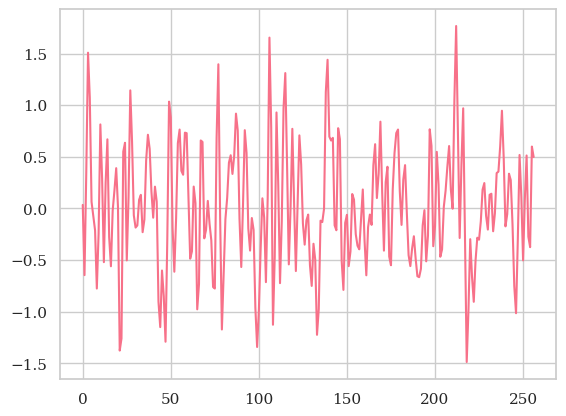

In [47]:
plt.plot(batch_eeg[0,0,:])

In [ ]:
eeg_ch_1 = dataset.X[0,0,:]
f, ps_version1 = PS(time_signal=eeg_ch_1, f_sampling=128, method='psd') # Power Spectral Density scaling
f, ps_version2 = PS(time_signal=eeg_ch_1, f_sampling=128, method='ps')  # Power Spectrum scaling

plt.plot(f[0:len(f)//2-1], ps_version1[0:len(f)//2-1])
plt.plot(f[0:len(f)//2-1], ps_version2[0:len(f)//2-1])
plt.legend(['PSD', 'Power Spectrum'])
plt.ylabel('Power (dB)')
plt.xlabel('Frequency (Hz)')
plt.show()

In [48]:
df = pd.DataFrame(batch_eeg[0].T)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       257 non-null    float64
 1   1       257 non-null    float64
 2   2       257 non-null    float64
 3   3       257 non-null    float64
 4   4       257 non-null    float64
 5   5       257 non-null    float64
 6   6       257 non-null    float64
 7   7       257 non-null    float64
 8   8       257 non-null    float64
 9   9       257 non-null    float64
 10  10      257 non-null    float64
 11  11      257 non-null    float64
 12  12      257 non-null    float64
 13  13      257 non-null    float64
 14  14      257 non-null    float64
 15  15      257 non-null    float64
 16  16      257 non-null    float64
 17  17      257 non-null    float64
 18  18      257 non-null    float64
 19  19      257 non-null    float64
 20  20      257 non-null    float64
 21  21      257 non-null    float64
dtypes:

2026-01-22 11:28:34,802 - category.py - update - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-22 11:28:34,817 - category.py - update - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


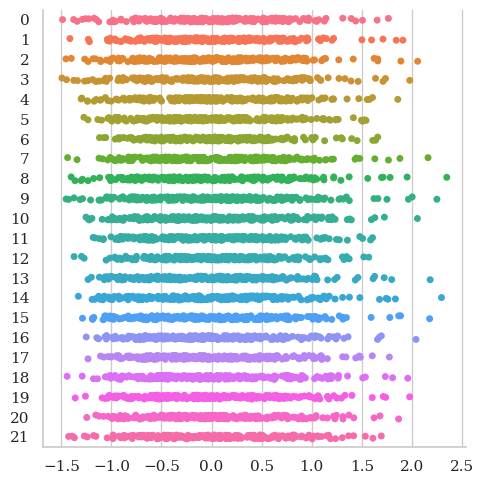

In [49]:
sns.catplot(data=df,kind='strip', orient='y')

# Architecture

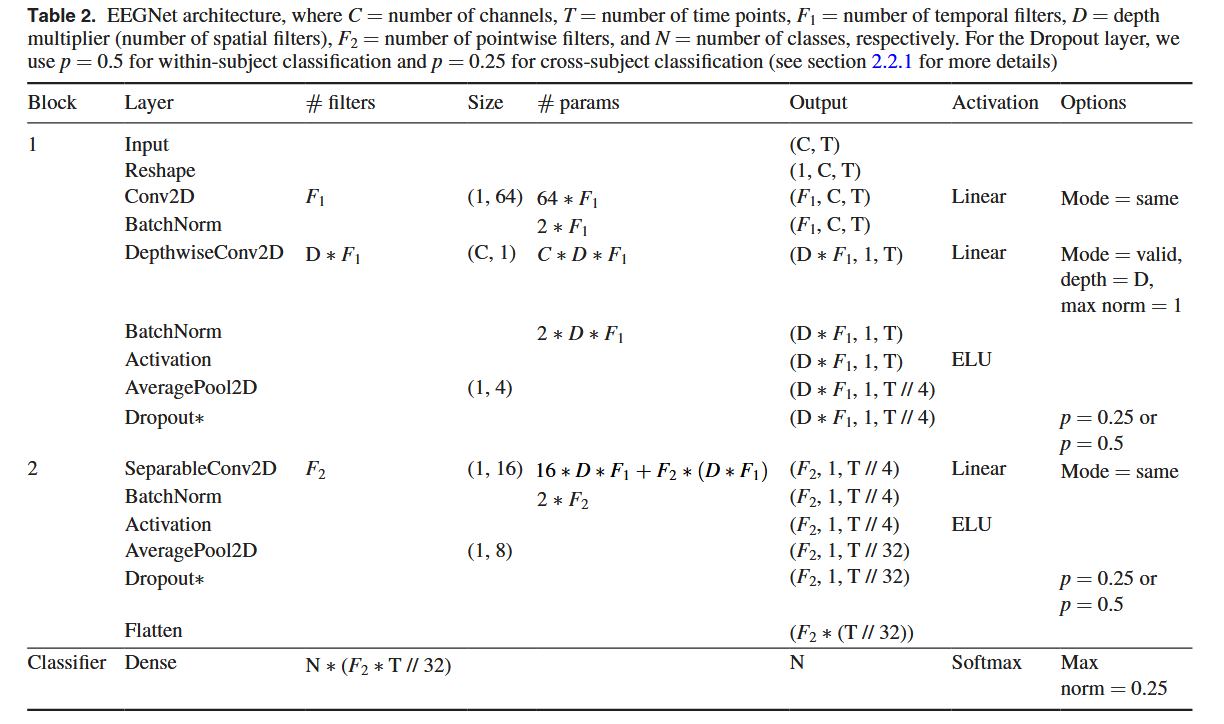

**EEGNet-8,2 parameters:**

F1 = 8 -> temporal filters

D = 2 -> spatial filters

F2 = F1*D -> pointwise convolutions, can be any number but authors choose this

In [50]:
# Define model
class reEEGNet(nn.Module):
    def __init__(self, C, T, F1=8, D=2, p=0.5):
        # C = number of channels, input.shape[1], C = 22 based on 02_preprocessing_pipeline
        # T = number of timepoints per batch, input.shape[2], T = 257 based on 02_preprocessing_pipeline
        # F1 = temporal filters
        # D = spatial filters
        # p = dropout probability: 0.5 for within-subject classification, 0.25 for cross-subject classification

        super().__init__()
        F2 = F1*D # pointwise convolutions, can be any number but authors choose this
        self.temporal = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=F1,
                kernel_size=(1,32),
                padding='same', # keeps initial dims per channel
                groups=1, # default
                bias=False # "We omit the use of bias units in all convolutional layers."
            ),
            # Linear activation = do nothing?
            nn.BatchNorm2d(num_features=F1)) # "We apply batch normalization along the feature map dimension"
        
        self.spatial = nn.Conv2d(
            in_channels=F1,
            out_channels=D*F1,
            kernel_size=(C,1), 
            padding='valid', # no padding -> collapses channel dimension
            groups=F1, # produces depthwise convolution
            bias=False # "We omit the use of bias units in all convolutional layers."
            )
        # "We also regularize each spatial filter by using a maximum norm constraint of 1 on its weights"
        max_norm_value = 1.0 
        self.spatial.weight.register_hook(lambda x: torch.clamp(x, min=-max_norm_value, max=max_norm_value))

        self.aggregation = nn.Sequential(
            nn.BatchNorm2d(num_features=D*F1), # "We apply batch normalization along the feature map dimension"
            nn.ELU(),
            nn.AvgPool2d(kernel_size=(1,4)), # default stride = kernel_size 
            nn.Dropout(p=p)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d( # depthwise part of separable convolution
            in_channels=D*F1,
            out_channels=D*F1,
            kernel_size=(1,16), 
            padding='same', # keeps initial dims per channel
            groups=D*F1, # produces depthwise convolution
            bias=False # "We omit the use of bias units in all convolutional layers."
            ),
            nn.Conv2d( # pointwise part of separable convolution
            in_channels=D*F1,
            out_channels=F2,
            kernel_size=(1,1), 
            padding='same', # keeps initial dims per channel, shouldn't matter in this case
            groups=1, # default
            bias=False # "We omit the use of bias units in all convolutional layers."
            ),
            # Linear activation = do nothing?
            nn.BatchNorm2d(num_features=F2), # "We apply batch normalization along the feature map dimension"
            nn.ELU(),
            nn.AvgPool2d(kernel_size=(1,8)), # default stride = kernel_size
            nn.Dropout(p=p),
            nn.Flatten()
        )

        self.classifier = nn.Linear(
                in_features=F2*(T//32),
                out_features=4, # number of classes
                bias=True # since it's not a convolutional layer..?
            )
        max_norm_value_1 = 0.25 
        self.classifier.weight.register_hook(lambda x: torch.clamp(x, min=-max_norm_value_1, max=max_norm_value_1))
        
        # nn.Softmax(dim=1) # dim = 0 is for batch number; comented out because of nn.CrossEntropyLoss() documentation:
        # "The input is expected to contain the unnormalized logits for each class (which do not need to be positive or sum to 1, in general)."



    def forward(self, x):
        x = torch.unsqueeze(x,dim=1) # inserts new dim at specified position, shape = (n_batches, C, T) -> shape = (n_batches, 1, C, T)
        filter_bank = self.temporal(x)
        spatial_pattern = self.spatial(filter_bank)
        block_1_out = self.aggregation(spatial_pattern)
        block_2_out = self.block_2(block_1_out)
        output = self.classifier(block_2_out)
        
        return output

In [51]:
model = reEEGNet(C=dataset.X.shape[1], T=dataset.X.shape[2])

In [52]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor])

Model's state_dict:
temporal.0.weight 	 tensor([[[[ 1.5352e-01,  1.6199e-01, -1.1918e-01, -2.5277e-02, -1.1045e-01,
            1.0073e-01, -1.7475e-01,  1.6975e-01, -2.8900e-02,  5.0852e-02,
           -1.4898e-01,  1.5100e-01, -1.3017e-01, -6.0746e-02,  1.5249e-01,
            1.2016e-01,  1.6657e-01,  4.7562e-02, -9.8811e-02, -1.1554e-01,
            1.6599e-01,  1.5877e-02,  9.9340e-03,  1.2023e-01,  4.4248e-02,
           -6.5623e-03, -1.6795e-01,  8.8920e-02,  1.4882e-01, -3.8316e-02,
            8.9979e-02, -1.3779e-01]]],


        [[[-1.6191e-01, -6.2202e-02, -4.5990e-02,  2.7378e-02,  7.4368e-02,
            1.1343e-02, -4.8418e-02,  1.1215e-01,  1.1179e-01, -1.2680e-01,
           -3.1233e-02,  1.2868e-02,  1.2598e-02,  9.1004e-02,  2.8893e-05,
            5.5071e-02,  2.9644e-02,  1.2000e-01, -1.0851e-01,  4.7755e-02,
            7.1236e-02,  9.7524e-02, -4.5793e-02, -6.9287e-02,  3.4342e-02,
           -1.5897e-01,  8.5607e-02,  2.4397e-02, -1.4007e-01, -1.4718e-01,
      

In [53]:
print(model.parameters())

<generator object Module.parameters at 0x000002502FE097E0>


# Training

"We run 500 training iterations (epochs) and perform validation stopping, saving the model weights which produced the lowest validation set loss."

In [54]:
loss_fn = nn.CrossEntropyLoss() # "minimizing the categorical cross-entropy loss function"

# "We fit the model using the Adam optimizer, using default parameters as described in [75]"
# they used tensorflow, for parameters shared with pytorch only eps is slightly different
optimizer = torch.optim.Adam(
    params = model.parameters(),
    eps=1e-07, # the only change from default eps=1e-8, shouldn't matter I think
    foreach=None, # default, "If memory is prohibitive, batch fewer parameters through the optimizer at a time or switch this flag to False"
    fused=None, # default, "To force running the for-loop implementation, pass False for either foreach or fused."
    )

In [55]:
def train(model, optimizer, loss_fn, train_loader, val_loader, nepochs=500):
    '''
    Train a pytorch model and evaluate it every epoch.
    Params:
    model - a pytorch model to train
    optimizer - an optimizer
    loss_fn - the criterion (loss function)
    nepochs - number of training epochs
    train_loader - dataloader for the trainset
    val_loader - dataloader for the valset

    Returns: 
    1. state_dict of the model with the lowest validation loss, 
    2. list of train losses,
    3. list of validation losses.
    '''
    
    # Detect device and move model to it
    device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
    print(f"Training on {device} device")
    
    # Move model to device
    model = model.to(device)
    
    
    train_losses, val_losses = [], []
    best_model = model.state_dict()

    for e in range(nepochs):
        running_loss = 0
        running_val_loss = 0
        for signals, labels in train_loader: # signals = (batch, C, T), labels = (batch, label)

            # Map the old values (7, 8, 9, 10) to new values (0, 1, 2, 3) -> need to change data processing later
            new_labels = torch.zeros_like(labels)
            new_labels[labels == 7] = 0
            new_labels[labels == 8] = 1
            new_labels[labels == 9] = 2
            new_labels[labels == 10] = 3
            
            signals = signals.float() # added to avoid dtype mismatch error

            # Move data to device
            signals, new_labels = signals.to(device), new_labels.to(device)

            # Training pass
            model.train() # set model in train mode
            preds = model(signals)
            loss = loss_fn(preds,new_labels)

            running_loss += loss.item()

            # Backpropagation
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

    #else:
        val_loss = 0
        # Evalaute model on validation at the end of each epoch.
        with torch.no_grad():
            for signals, labels in val_loader: # signals = (batch, C, T), labels = (batch, label)

                # Map the old values (7, 8, 9, 10) to new values (0, 1, 2, 3) -> need to change data processing later
                new_labels = torch.zeros_like(labels)
                new_labels[labels == 7] = 0
                new_labels[labels == 8] = 1
                new_labels[labels == 9] = 2
                new_labels[labels == 10] = 3

                signals = signals.float() # added to avoid dtype mismatch error
                
                # Move data to device
                signals, new_labels = signals.to(device), new_labels.to(device)
                
                preds = model(signals)
                val_loss = loss_fn(preds,new_labels)

                running_val_loss += val_loss.item()

        # track train loss and validation loss
        train_losses.append(running_loss/len(train_loader))
        val_losses.append(running_val_loss/len(val_loader))

        if running_val_loss == np.min(np.array(val_losses)):
            best_model = model.state_dict()

        if e%50==0:
            print("Epoch: {}/{}.. ".format(e+1, nepochs),
            "Training Loss: {:.3f}.. ".format(running_loss/len(train_loader)),
            "Validation Loss: {:.3f}.. ".format(running_val_loss/len(val_loader)))

    return best_model, train_losses, val_losses

In [56]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")
best_model, train_losses, val_losses = train(model, optimizer, loss_fn, train_loader, val_loader, nepochs=500)

Using cuda device
Training on cuda device
Epoch: 1/500..  Training Loss: 1.407..  Validation Loss: 1.353.. 
Epoch: 51/500..  Training Loss: 1.147..  Validation Loss: 1.106.. 
Epoch: 101/500..  Training Loss: 0.946..  Validation Loss: 0.974.. 
Epoch: 151/500..  Training Loss: 0.822..  Validation Loss: 0.690.. 
Epoch: 201/500..  Training Loss: 0.715..  Validation Loss: 0.652.. 
Epoch: 251/500..  Training Loss: 0.828..  Validation Loss: 0.579.. 
Epoch: 301/500..  Training Loss: 0.444..  Validation Loss: 0.614.. 
Epoch: 351/500..  Training Loss: 0.472..  Validation Loss: 0.429.. 
Epoch: 401/500..  Training Loss: 0.775..  Validation Loss: 0.427.. 
Epoch: 451/500..  Training Loss: 0.442..  Validation Loss: 0.605.. 


In [57]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in best_model:
    print(param_tensor, "\t", best_model[param_tensor])

Model's state_dict:
temporal.0.weight 	 tensor([[[[ 1.6601e-01,  2.0572e-01,  8.1814e-02,  1.2977e-01, -1.5474e-01,
            1.5838e-02, -2.3256e-01,  3.2677e-02, -1.1741e-01,  1.1629e-01,
           -3.3032e-02,  2.9902e-01,  1.3026e-01,  1.1883e-01,  7.9886e-02,
           -9.4922e-02, -1.0632e-01, -1.4992e-01, -8.0277e-02, -5.9065e-02,
            1.1813e-01,  2.8721e-02,  1.5961e-01,  1.7702e-01,  2.9846e-02,
            6.0388e-02, -1.7734e-01, -1.3533e-01, -1.0788e-01, -1.5756e-01,
            8.0503e-02,  5.6488e-02]]],


        [[[-1.6312e-01, -6.2756e-02, -4.9464e-02,  4.1318e-02,  1.5525e-01,
            1.6515e-01,  6.4423e-02,  9.3371e-02,  3.3259e-02, -1.7628e-01,
           -4.6726e-02, -1.4481e-02, -3.9573e-02,  4.1721e-02,  1.2489e-02,
            1.2219e-01,  7.1666e-02,  1.4231e-01, -9.5675e-02, -3.0755e-02,
           -1.0594e-01, -2.9141e-02, -4.8403e-02, -1.5824e-03,  1.7138e-01,
            1.9029e-03,  1.7695e-01,  7.7811e-02, -6.4067e-02, -1.3450e-01,
      

Text(0, 0.5, 'Loss')

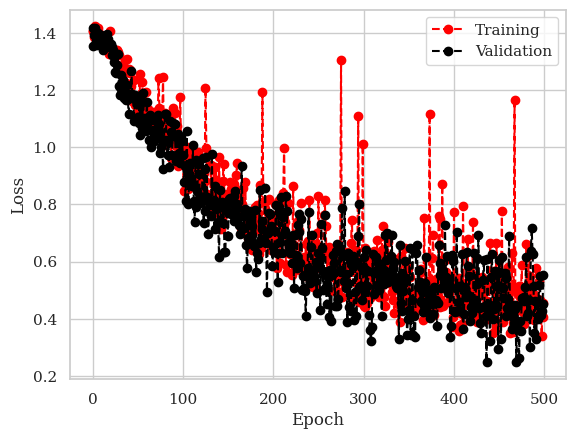

In [58]:
plt.plot(np.arange(len(train_losses)),train_losses,'ro--')
plt.plot(np.arange(len(val_losses)),val_losses,'ko--')
plt.legend(labels=['Training','Validation'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [59]:
#torch.save(best_model, PATH)

## Trying to visualize one of the filters, ignore for now

In [60]:
temporal_filters = best_model['temporal.0.weight']

In [61]:
temp_f_1 = temporal_filters[0,0,0]

In [62]:
temp_f_1.shape[0]

32

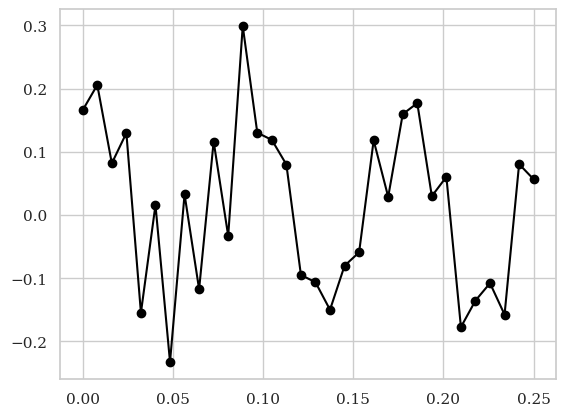

In [64]:
# Convert cuda:0 device type tensor to numpy
temp_f_1 = temp_f_1.cpu().numpy()

t = np.linspace(0,0.25,temp_f_1.shape[0]) # filter should cover ~250 ms of input (if input is 257 points and filter is 32 points long)
plt.plot(t, temp_f_1, 'ko-')

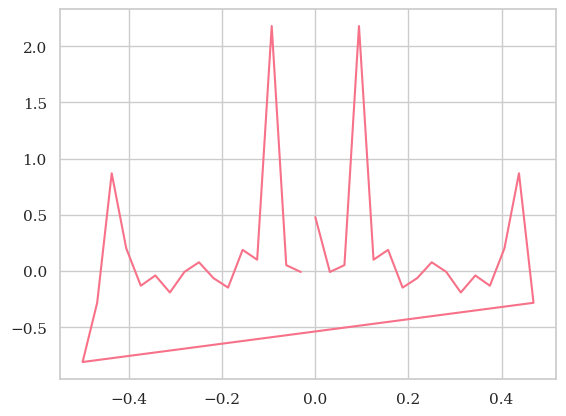

In [65]:
sp = np.fft.fft(temp_f_1)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real)
#plt.plot(freq, sp.imag)

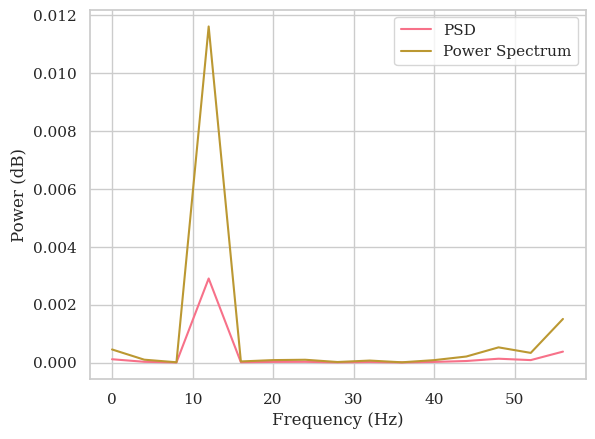

In [67]:
f, ps_version1 = PS(time_signal=temp_f_1, f_sampling=128, method='psd') # Power Spectral Density scaling
f, ps_version2 = PS(time_signal=temp_f_1, f_sampling=128, method='ps')  # Power Spectrum scaling

plt.plot(f[0:len(f)//2-1], ps_version1[0:len(f)//2-1])
plt.plot(f[0:len(f)//2-1], ps_version2[0:len(f)//2-1])
plt.legend(['PSD', 'Power Spectrum'])
plt.ylabel('Power (dB)')
plt.xlabel('Frequency (Hz)')
plt.show()

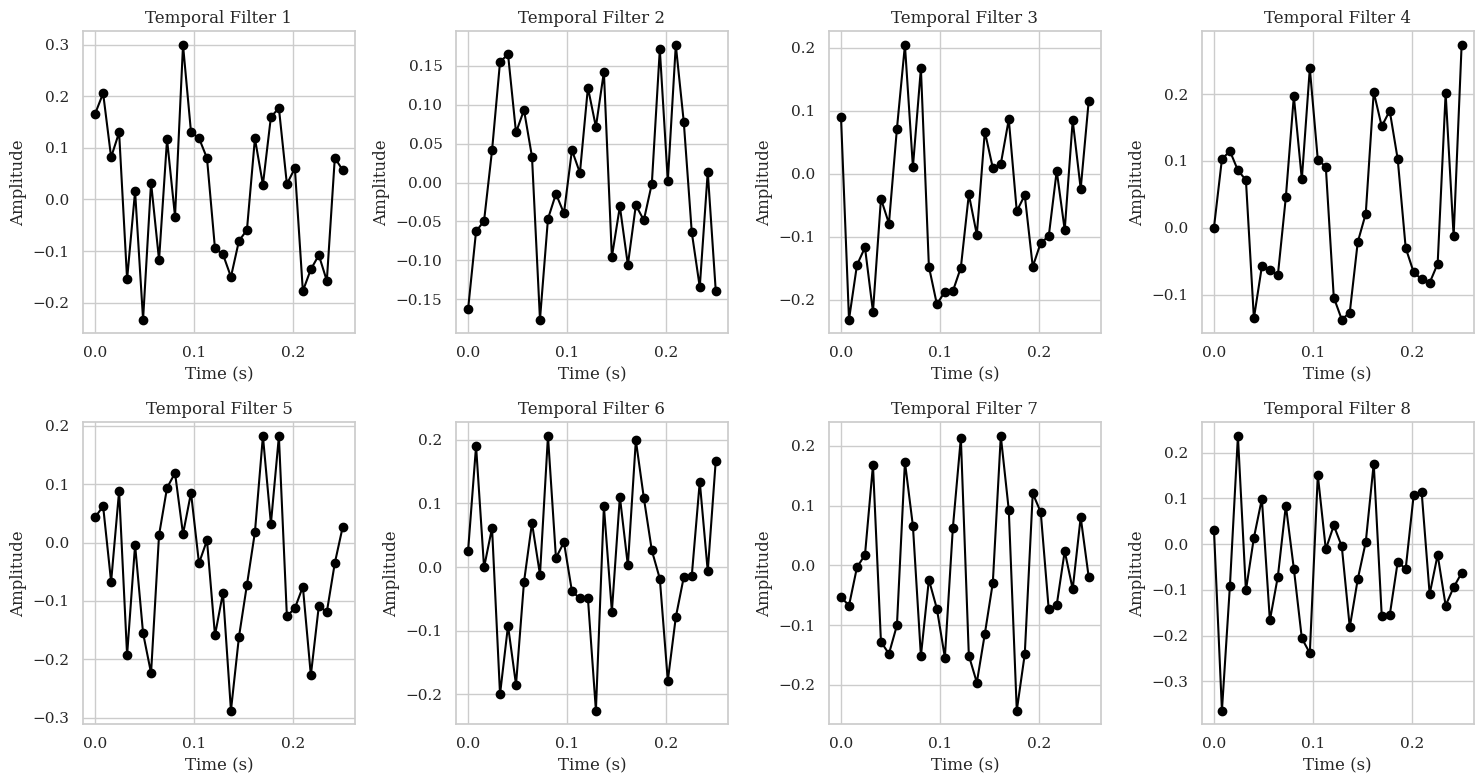

In [69]:
# Plotting learned temporal filters in subplots
n_filters = temporal_filters.shape[0]
n_cols = 4
n_rows = n_filters // n_cols + int(n_filters % n_cols > 0)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
for i in range(n_filters):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].plot(t, temporal_filters[i, 0, 0].cpu().numpy(), 'ko-')
    axes[row, col].set_title(f'Temporal Filter {i+1}')
    axes[row, col].set_xlabel('Time (s)')
    axes[row, col].set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [ ]:
def plot_power_spectra_of_temporal_filters(model_dict) -> None:
    # Plotting learned temporal filters in subplots
    temporal_filters = model_dict['temporal.0.weight']
    n_filters = temporal_filters.shape[0]
    n_cols = 4
    n_rows = n_filters // n_cols + int(n_filters % n_cols > 0)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
    for i in range(n_filters):
        row = i // n_cols
        col = i % n_cols
        #f, ps_version1 = PS(time_signal=temporal_filters[i, 0, 0].cpu().numpy(), f_sampling=128, method='psd') # Power Spectral Density scaling
        f, ps_version2 = PS(time_signal=temporal_filters[i, 0, 0].cpu().numpy(), f_sampling=128, method='ps')  # Power Spectrum scaling
        #axes[row, col].plot(f[0:len(f)//2-1], ps_version1[0:len(f)//2-1], 'ko-')
        axes[row, col].plot(f[0:len(f)//2-1], ps_version2[0:len(f)//2-1], 'ro-')
        axes[row, col].set_title(f'Temporal Filter {i+1}')
        axes[row, col].set_xlabel('Frequency (Hz)')
        axes[row, col].set_ylabel('Power (dB)')
        axes[row, col].set_xticks(range(0,51,10))
        #axes[row, col].legend(['PSD', 'Power Spectrum'])
    plt.tight_layout()
    plt.show()

In [ ]:
from mne.viz import plot_topomap
import mne

def plot_spatial_filters(model_dict):
    
    # Visualize learned spatial filters using montages
    # Isolate the area that has electrodes and plot topomaps
    info = mne.create_info(
        ch_names=[
                'Fz',  'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5',  'C3',  'C1',  'Cz', 
                'C2',  'C4',  'C6',  'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'P1',  'Pz', 
                'P2',  'POz'
            ],
        sfreq=128,
        ch_types='eeg'
    )
    montage = mne.channels.make_standard_montage('standard_1020')
    info.set_montage(montage)
    spatial_filters = model_dict['spatial.weight']  # shape = (F1*D, F1, C, 1)
    num_filters = spatial_filters.shape[0]
    # Plot in a grid
    n_cols = 4
    n_rows = int(np.ceil(num_filters / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))
    for i in range(num_filters):
        ax = axes[i // n_cols, i % n_cols]
        filter_weights = spatial_filters[i, 0, :, 0].cpu().numpy()  # shape = (C,)
        plot_topomap(filter_weights, info, axes=ax, show=False, cmap='viridis')
        ax.set_title(f'Spatial Filter {i+1}')
    plt.tight_layout()
    plt.show()



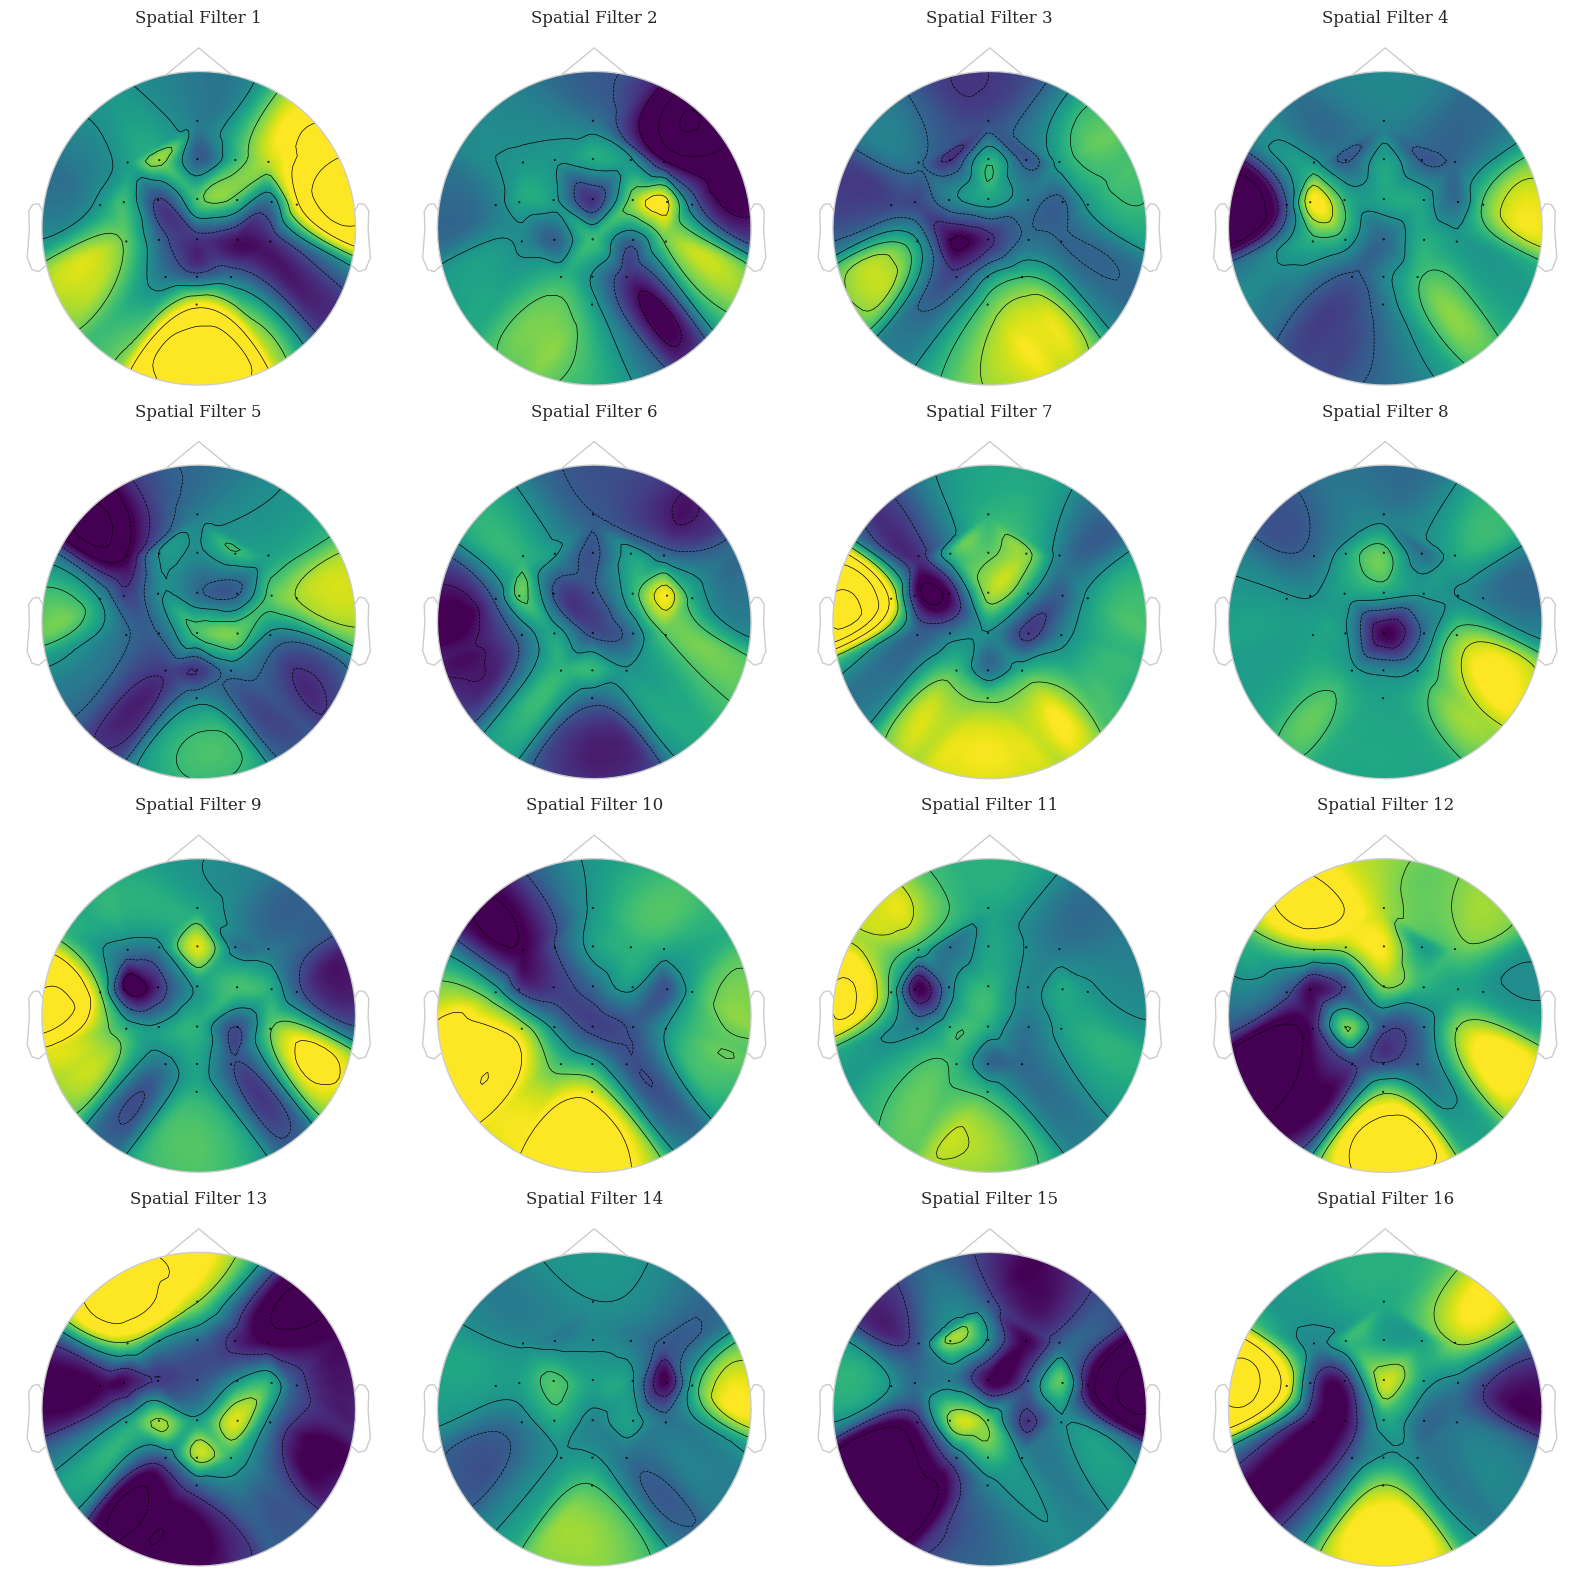

Validation Accuracy: 85.71%


In [72]:
# Visualize learned spatial filters using montages
# Isolate the area that has electrodes and plot topomaps
from mne.viz import plot_topomap
import mne
info = mne.create_info(
    ch_names=[
            'Fz',  'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'C5',  'C3',  'C1',  'Cz', 
            'C2',  'C4',  'C6',  'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'P1',  'Pz', 
            'P2',  'POz'
        ],
    sfreq=128,
    ch_types='eeg'
)
montage = mne.channels.make_standard_montage('standard_1020')
info.set_montage(montage)
spatial_filters = best_model['spatial.weight']  # shape = (F1*D, F1, C, 1)
num_filters = spatial_filters.shape[0]
# Plot in a grid
n_cols = 4
n_rows = int(np.ceil(num_filters / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))
for i in range(num_filters):
    ax = axes[i // n_cols, i % n_cols]
    filter_weights = spatial_filters[i, 0, :, 0].cpu().numpy()  # shape = (C,)
    plot_topomap(filter_weights, info, axes=ax, show=False, cmap='viridis')
    ax.set_title(f'Spatial Filter {i+1}')
plt.tight_layout()
plt.show()

# Evaluate model accuracy on validation set
def evaluate_model(model, val_loader):
    correct = 0
    total = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for signals, labels in val_loader:
            # Map the old values (7, 8, 9, 10) to new values (0, 1, 2, 3)
            new_labels = torch.zeros_like(labels)
            new_labels[labels == 7] = 0
            new_labels[labels == 8] = 1
            new_labels[labels == 9] = 2
            new_labels[labels == 10] = 3

            signals = signals.float()  # ensure correct dtype
            
            # Move data to device
            signals, new_labels = signals.to(device), new_labels.to(device)

            outputs = model(signals)
            _, predicted = torch.max(outputs.data, 1)
            total += new_labels.size(0)
            correct += (predicted == new_labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy
accuracy = evaluate_model(model, val_loader)
print(f'Validation Accuracy: {accuracy:.2f}%')

# Permutation Test for Statistical Significance

A permutation test helps us determine if our model's performance is statistically significant by comparing it against a null distribution created by randomly permuting the labels.

In [75]:
def permutation_test(model_class, optimizer_func, loss_fn, train_loader, val_loader, 
                     original_accuracy, n_permutations=100, nepochs=200, C=22, T=257):
    """
    Perform permutation test by training models with shuffled labels.
    
    Args:
        model_class: The model class to instantiate (e.g., reEEGNet)
        optimizer_func: Function to create optimizer given model parameters
        loss_fn: Loss function
        train_loader: Training data loader
        val_loader: Validation data loader
        original_accuracy: The accuracy of the model with correct labels
        n_permutations: Number of permutation iterations
        nepochs: Number of epochs to train each permuted model
        C: Number of channels
        T: Number of time points
        
    Returns:
        permuted_accuracies: List of accuracies from permuted label models
        p_value: Statistical significance p-value
    """
    import random
    
    permuted_accuracies = []
    
    print(f"Running permutation test with {n_permutations} iterations...")
    print(f"Original model accuracy: {original_accuracy:.2f}%")
    
    for i in range(n_permutations):
        # Create a copy of the dataset with permuted labels
        # We'll create new data loaders with shuffled labels
        train_dataset_permuted = []
        for signals, labels in train_loader.dataset:
            train_dataset_permuted.append((signals, labels))
        
        # Shuffle the labels
        labels_only = [item[1] for item in train_dataset_permuted]
        random.shuffle(labels_only)
        
        # Create new dataset with shuffled labels
        train_dataset_shuffled = [(signals, new_label) for (signals, _), new_label in 
                                 zip(train_dataset_permuted, labels_only)]
        
        # Create new data loader
        train_loader_shuffled = data.DataLoader(train_dataset_shuffled, batch_size=64, shuffle=True)
        
        # Initialize new model with same architecture
        permuted_model = model_class(C=C, T=T)
        permuted_optimizer = optimizer_func(permuted_model.parameters())
        
        # Train the model with shuffled labels
        _, _, _ = train(permuted_model, permuted_optimizer, loss_fn, 
                      train_loader_shuffled, val_loader, nepochs=nepochs)
        
        # Evaluate the permuted model
        permuted_acc = evaluate_model(permuted_model, val_loader)
        permuted_accuracies.append(permuted_acc)
        
        if (i + 1) % 10 == 0:
            print(f"Completed {i + 1}/{n_permutations} permutations. "
                  f"Latest permuted accuracy: {permuted_acc:.2f}%")
    
    # Calculate p-value
    # P-value is the proportion of permuted accuracies >= original accuracy
    p_value = sum(1 for acc in permuted_accuracies if acc >= original_accuracy) / n_permutations
    
    return permuted_accuracies, p_value

In [76]:
# Run the permutation test
# Note: This will take some time as it trains multiple models

# First, let's get our original model's accuracy
original_accuracy = evaluate_model(model, val_loader)
print(f"Original model accuracy: {original_accuracy:.2f}%")

# Define optimizer function
def create_optimizer(params):
    return torch.optim.Adam(params, eps=1e-07)

# Run permutation test with fewer permutations and epochs for demonstration
# For publication-quality results, use n_permutations=1000 and nepochs=500
permuted_accuracies, p_value = permutation_test(
    model_class=reEEGNet,
    optimizer_func=create_optimizer,
    loss_fn=loss_fn,
    train_loader=train_loader,
    val_loader=val_loader,
    original_accuracy=original_accuracy,
    n_permutations=50,  # Reduce for faster execution
    nepochs=100,        # Reduce for faster execution
    C=dataset.X.shape[1],
    T=dataset.X.shape[2]
)

print(f"\nPermutation Test Results:")
print(f"Original accuracy: {original_accuracy:.2f}%")
print(f"Mean permuted accuracy: {np.mean(permuted_accuracies):.2f}%")
print(f"Std permuted accuracy: {np.std(permuted_accuracies):.2f}%")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Model performance is statistically significant (p < 0.05)")
else:
    print("Model performance is NOT statistically significant (p >= 0.05)")

Original model accuracy: 85.71%
Running permutation test with 50 iterations...
Original model accuracy: 85.71%
Training on cuda device
Epoch: 1/100..  Training Loss: 1.404..  Validation Loss: 1.431.. 
Epoch: 51/100..  Training Loss: 1.371..  Validation Loss: 1.383.. 
Training on cuda device
Epoch: 1/100..  Training Loss: 1.387..  Validation Loss: 1.431.. 
Epoch: 51/100..  Training Loss: 1.343..  Validation Loss: 1.448.. 
Training on cuda device
Epoch: 1/100..  Training Loss: 1.379..  Validation Loss: 1.378.. 
Epoch: 51/100..  Training Loss: 1.404..  Validation Loss: 1.478.. 
Training on cuda device
Epoch: 1/100..  Training Loss: 1.412..  Validation Loss: 1.420.. 
Epoch: 51/100..  Training Loss: 1.312..  Validation Loss: 1.440.. 
Training on cuda device
Epoch: 1/100..  Training Loss: 1.437..  Validation Loss: 1.392.. 
Epoch: 51/100..  Training Loss: 1.373..  Validation Loss: 1.466.. 
Training on cuda device
Epoch: 1/100..  Training Loss: 1.378..  Validation Loss: 1.388.. 
Epoch: 51/100.

C:\Users\Prashastha\AppData\Local\Temp\ipykernel_41668\2342867277.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([permuted_accuracies], labels=['Permuted Models'])


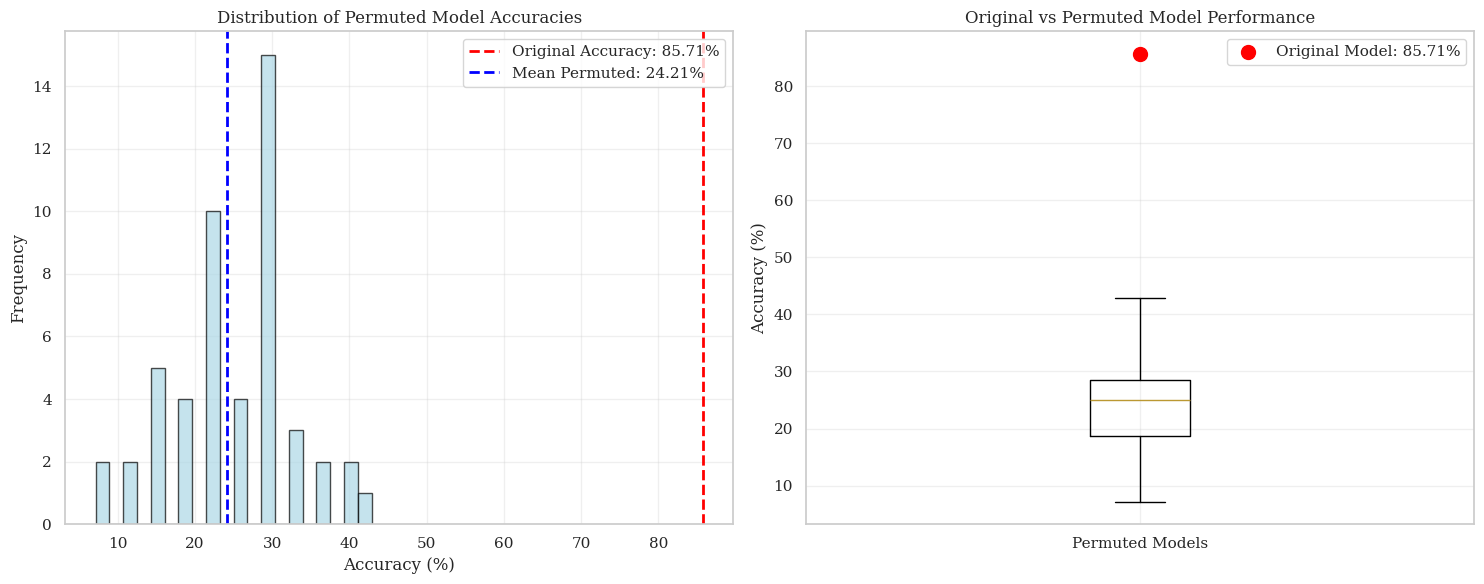


Detailed Statistics:
Original accuracy: 85.71%
Chance level (25% for 4-class): 25.00%
Permuted accuracies - Min: 7.14%
Permuted accuracies - Max: 42.86%
Permuted accuracies - Mean: 24.21%
Permuted accuracies - Median: 25.00%
Effect size (Cohen's d): 7.66
Number of permuted models with accuracy >= original: 0
P-value: 0.0000

Interpretation: The model's performance is highly significant (p < 0.001)


In [77]:
# Visualize the permutation test results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram of permuted accuracies
ax1.hist(permuted_accuracies, bins=20, alpha=0.7, color='lightblue', edgecolor='black')
ax1.axvline(original_accuracy, color='red', linestyle='--', linewidth=2, 
           label=f'Original Accuracy: {original_accuracy:.2f}%')
ax1.axvline(np.mean(permuted_accuracies), color='blue', linestyle='--', linewidth=2,
           label=f'Mean Permuted: {np.mean(permuted_accuracies):.2f}%')
ax1.set_xlabel('Accuracy (%)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Permuted Model Accuracies')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Box plot comparison
ax2.boxplot([permuted_accuracies], labels=['Permuted Models'])
ax2.scatter([1], [original_accuracy], color='red', s=100, zorder=5, 
           label=f'Original Model: {original_accuracy:.2f}%')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Original vs Permuted Model Performance')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional statistics
print(f"\nDetailed Statistics:")
print(f"Original accuracy: {original_accuracy:.2f}%")
print(f"Chance level (25% for 4-class): 25.00%")
print(f"Permuted accuracies - Min: {np.min(permuted_accuracies):.2f}%")
print(f"Permuted accuracies - Max: {np.max(permuted_accuracies):.2f}%")
print(f"Permuted accuracies - Mean: {np.mean(permuted_accuracies):.2f}%")
print(f"Permuted accuracies - Median: {np.median(permuted_accuracies):.2f}%")
print(f"Effect size (Cohen's d): {(original_accuracy - np.mean(permuted_accuracies)) / np.std(permuted_accuracies):.2f}")
print(f"Number of permuted models with accuracy >= original: {sum(1 for acc in permuted_accuracies if acc >= original_accuracy)}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.001:
    significance = "highly significant (p < 0.001)"
elif p_value < 0.01:
    significance = "very significant (p < 0.01)"
elif p_value < 0.05:
    significance = "significant (p < 0.05)"
else:
    significance = "not significant (p >= 0.05)"

print(f"\nInterpretation: The model's performance is {significance}")

## Alternative: Quick Permutation Test on Pre-trained Model

If you want to run a faster version that doesn't retrain models but instead evaluates the pre-trained model on permuted validation data:

Running quick permutation test with 1000 iterations...

Quick Permutation Test Results:
Original accuracy: 85.71%
Mean permuted accuracy: 24.43%
P-value: 0.0000


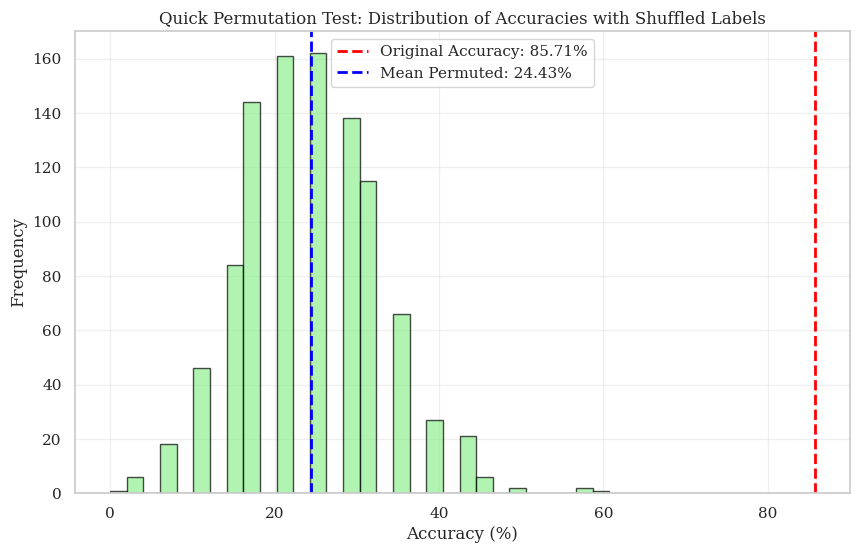

Quick permutation test p-value: 0.0000
Model performance is statistically significant (p < 0.05)


In [79]:
def quick_permutation_test(model, val_loader, n_permutations=1000):
    """
    Quick permutation test using pre-trained model on shuffled validation labels.
    This is much faster but less rigorous than retraining models.
    """
    import random
    
    # Get original accuracy
    original_accuracy = evaluate_model(model, val_loader)
    
    # Collect all validation data
    all_signals = []
    all_labels = []
    
    for signals, labels in val_loader:
        all_signals.append(signals)
        all_labels.append(labels)
    
    all_signals = torch.cat(all_signals, dim=0)
    all_labels = torch.cat(all_labels, dim=0)
    
    permuted_accuracies = []

    # Send model to device
    model = model.to(device)
    
    print(f"Running quick permutation test with {n_permutations} iterations...")
    
    for i in range(n_permutations):
        # Shuffle labels
        indices = list(range(len(all_labels)))
        random.shuffle(indices)
        shuffled_labels = all_labels[indices]
        
        # Calculate accuracy with shuffled labels
        model.eval()
        with torch.no_grad():
            # Map the old values (7, 8, 9, 10) to new values (0, 1, 2, 3)
            new_labels = torch.zeros_like(shuffled_labels)
            new_labels[shuffled_labels == 7] = 0
            new_labels[shuffled_labels == 8] = 1
            new_labels[shuffled_labels == 9] = 2
            new_labels[shuffled_labels == 10] = 3
            
            signals = all_signals.float().to(device)
            new_labels = new_labels.to(device)
            
            outputs = model(signals)
            _, predicted = torch.max(outputs.data, 1)
            
            correct = (predicted == new_labels).sum().item()
            accuracy = 100 * correct / len(new_labels)
            permuted_accuracies.append(accuracy)
    
    # Calculate p-value
    p_value = sum(1 for acc in permuted_accuracies if acc >= original_accuracy) / n_permutations
    
    print(f"\nQuick Permutation Test Results:")
    print(f"Original accuracy: {original_accuracy:.2f}%")
    print(f"Mean permuted accuracy: {np.mean(permuted_accuracies):.2f}%")
    print(f"P-value: {p_value:.4f}")
    
    return permuted_accuracies, p_value, original_accuracy

# Run quick permutation test
quick_permuted_accs, quick_p_value, orig_acc = quick_permutation_test(model, val_loader, n_permutations=1000)

# Visualize quick results
plt.figure(figsize=(10, 6))
plt.hist(quick_permuted_accs, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
plt.axvline(orig_acc, color='red', linestyle='--', linewidth=2, 
           label=f'Original Accuracy: {orig_acc:.2f}%')
plt.axvline(np.mean(quick_permuted_accs), color='blue', linestyle='--', linewidth=2,
           label=f'Mean Permuted: {np.mean(quick_permuted_accs):.2f}%')
plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')
plt.title('Quick Permutation Test: Distribution of Accuracies with Shuffled Labels')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Quick permutation test p-value: {quick_p_value:.4f}")
if quick_p_value < 0.05:
    print("Model performance is statistically significant (p < 0.05)")
else:
    print("Model performance is NOT statistically significant (p >= 0.05)")